In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
df = pd.read_excel("tesdata.xlsx")
df = df[df['DIABETE4'].isin([1,3])]

# Data Cleaning/Feature Engineering**

**Map to a format that makes sense for python models**

Original file was an SAS file. This means the majority of it was in a format which labele 1 as yes, 2 as no, and sometimes had numbers such as 7,9, or 99 represent 'other/no response'. Simple binary values or values whose scale is logical mathematically work better for regression models and such

In [3]:
#define maps for different columns based on their SAS formats

#if the person had one or more docs, say they had one, set to 1
#if they had no doc, set to 0
#else, return null so value can be imputed later
def simplify_doc(x):
    if x == 1 or x==2:
        return 1
    elif x == 3:
        return 0
    else:
        return None
    
#default map for all simple columns
#1 for yes, 0 for no, None for null/missing to impute later
def simplify(x):
    if x == 1:
        return 1
    elif x == 2:
        return 0
    else:
        return None
    
#for doctor and dentist checkups, map back to categorical response to be dummied later
def checkups(x):
    if x==1:
        return 'Past_Year'
    elif x==2:
        return 'Past_2_Years'
    elif x==3:
        return 'Past_5_Years'
    elif x==4:
        return 'More_Than_5_Years'
    elif x==8:
        return 'Never'
    else:
        return None
    
#for how many teeth are extracted, map to be dummied
def teeth(x):
    if x==1:
        return '1_to_5'
    elif x==2:
        return '6_or_more'
    elif x==3:
        return 'all'
    elif x==8:
        return 'None'
    else:
        return None
    
#No null values allowed, map 1 for clear yes and 3 for clear no
def diabetes(x):
    if x==1:
        return 1
    else:
        return 0
    
#map unkown to null to be imputed, otherwise return original value
def income(x):
    if x == 77 or x == 99:
        return None
    else:
        return x
    
# <1000 = pounds, return original value
# > 9000, < 9400 = kg with leading 9, convert to lbs
# return unkown as None to be imputed
def weight(x):
    if x < 1000:
        return x
    elif x > 9000 and x < 9400:
        y = x - 9000
        return y*2.2
    else:
        return None
    
#map back to categorical values, no null as has been imputed by data collector based on region, etc.
def race(x):
    if x==1:
        return 'White'
    elif x==2:
        return 'Black'
    elif x==3:
        return 'Asian'
    elif x==4:
        return 'Native'
    elif x==5:
        return 'Hispanic'
    else:
        return 'Other_Race'
    
#map back to categorical
def education(x):
    if x==1:
        return 'No_HS_Diploma'
    elif x==2:
        return 'HS'
    elif x ==3:
        return 'College'
    elif x==4:
        return 'College_Grad'
    else:
        return None
    
#map back to categorical
def smoker(x):
    if x==1:
        return 'Current_heavy'
    elif x==5:
        return 'Former_light'
    elif x==3:
        return 'Current_light'
    elif x ==4 or x ==2:
        return 'Former_Heavy'
    elif x==6:
        return 'Non_Smoker'
    else:
        return None

#apply all mappings

#do they have a primary care provider or not/unknown
df['PERSDOC3'] = df['PERSDOC3'].map(simplify_doc)
#have they not seen a doctor in the past 12 months because of cost or not/unknown
df['MEDCOST1'] = df['MEDCOST1'].map(simplify)
#when was their last checkup
df['CHECKUP1'] = df['CHECKUP1'].map(checkups)
#have they exercised in the past month
df['EXERANY2'] = df['EXERANY2'].map(simplify)
#when was their last dentist appt 
df['LASTDEN4'] = df['LASTDEN4'].map(checkups)
#have they had teeth removed?
df['RMVTETH4'] = df['RMVTETH4'].map(teeth)
#have they had a heart attack?
df['CVDINFR4'] = df['CVDINFR4'].map(simplify)
#have they had coronary heart disease?
df['CVDCRHD4'] = df['CVDCRHD4'].map(simplify)
#have they had a stroke
df['CVDSTRK3'] = df['CVDSTRK3'].map(simplify)
#have they had asthma
df['ASTHMA3'] = df['ASTHMA3'].map(simplify)
#have they had non melanoma skin cancer
df['CHCSCNC1'] = df['CHCSCNC1'].map(simplify)
#have they had other cancer
df['CHCOCNC1'] = df['CHCOCNC1'].map(simplify)
#have they had COPD< emphysema, or bronchitis?
df['CHCCOPD3'] = df['CHCCOPD3'].map(simplify)
#have they had kidney disease?
df['CHCKDNY2'] = df['CHCKDNY2'].map(simplify)
#have they had arthritis, gout, lupus, or fibromyalgia?
df['HAVARTH4'] = df['HAVARTH4'].map(simplify)
#have they had diabetes?
df['DIABETE4'] = df['DIABETE4'].map(diabetes)
#are they married?
df['MARITAL'] = df['MARITAL'].map(diabetes)
#are they a veteran?
df['VETERAN3'] = df['VETERAN3'].map(simplify)
#are they employed?
df['EMPLOY1'] = df['EMPLOY1'].map(simplify_doc)
#household income level
df['INCOME3'] = df['INCOME3'].map(income)
#are they pregnant?
df['PREGNANT'] = df['PREGNANT'].map(simplify)
#how much do they weigh? (lbs)
df['WEIGHT2'] = df['WEIGHT2'].map(weight)
#are they deaf?
df['DEAF'] = df['DEAF'].map(simplify)
#are they blind?
df['BLIND'] = df['BLIND'].map(simplify)
#do they have trouble walking?
df['DIFFWALK'] = df['DIFFWALK'].map(simplify)
#do they have trouble getting dressed?
df['DIFFDRES'] = df['DIFFDRES'].map(simplify)
#do they have difficulty wiht errands?
df['DIFFALON'] = df['DIFFALON'].map(simplify)
#did they get their flu shot this year?
df['FLUSHOT7'] = df['FLUSHOT7'].map(simplify)
#have they had difficulties with thinking or memory
df['CIMEMLO1'] = df['CIMEMLO1'].map(simplify)
#have they had trouble paying bills?
df['SDHBILLS'] = df['SDHBILLS'].map(simplify)
#have they had trouble getting to appts?
df['SDHTRNSP'] = df['SDHTRNSP'].map(simplify)
#what is their race?
df['_IMPRACE'] = df['_IMPRACE'].map(race)
#do they have health insurance?
df['_HLTHPL2'] = df['_HLTHPL2'].map(simplify)
#man = 1, women = 2
df['_SEX'] = df['_SEX'].map(diabetes)
#education level
df['_EDUCAG'] = df['_EDUCAG'].map(education)
#do they vape?
df['_CURECI3'] = df['_CURECI3'].map(simplify)
#smoking history
df['_LCSSMKG'] = df['_LCSSMKG'].map(smoker)
#did they drink recently
df['DRNKANY6'] = df['DRNKANY6'].map(simplify)

Impute either by mean or mode depending on column

In [4]:
from sklearn.impute import SimpleImputer

#impute avg for nulls
avgcols = ['WEIGHT2', '_BMI5']

#impute mode for nulls
cols = ['PERSDOC3', 'MEDCOST1', 'EXERANY2',
       'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCOCNC1',
       'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'MARITAL', 'VETERAN3',
       'EMPLOY1', 'INCOME3', 'PREGNANT', 'DEAF', 'BLIND',
       'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FLUSHOT7', 'CIMEMLO1', 'SDHBILLS',
       'SDHTRNSP', '_URBSTAT', '_HLTHPL2', '_SEX',
        '_CURECI3', 'DRNKANY6']

imp = SimpleImputer(strategy="most_frequent")
df[cols] = imp.fit_transform(df[cols])

imp_avg = SimpleImputer(strategy='mean')
df[avgcols] = imp_avg.fit_transform(df[avgcols])

Get dummies for categorical vars

In [5]:
col_to_dum = ['CHECKUP1', 'LASTDEN4', 'RMVTETH4', '_LCSSMKG', '_IMPRACE', '_EDUCAG']
dummies = pd.get_dummies(df[col_to_dum])
df = pd.concat([df, dummies], axis = 1)
df = df.drop(col_to_dum, axis = 1)
df = df.drop(['CHECKUP1_Past_5_Years', 'LASTDEN4_Past_5_Years', 'RMVTETH4_1_to_5', '_LCSSMKG_Former_light', '_IMPRACE_Other_Race', '_EDUCAG_College'], axis = 1)

intcols = ['CHECKUP1_More_Than_5_Years', 'CHECKUP1_Never', 'CHECKUP1_Past_2_Years',
       'CHECKUP1_Past_Year',
       'LASTDEN4_More_Than_5_Years', 'LASTDEN4_Never', 'LASTDEN4_Past_2_Years',
       'LASTDEN4_Past_Year',
       'RMVTETH4_6_or_more', 'RMVTETH4_None', 'RMVTETH4_all',
       '_LCSSMKG_Current_heavy', '_LCSSMKG_Current_light',
       '_LCSSMKG_Former_Heavy', '_LCSSMKG_Non_Smoker',
       '_IMPRACE_Asian', '_IMPRACE_Black', '_IMPRACE_Hispanic',
       '_IMPRACE_Native', '_IMPRACE_White', '_EDUCAG_College_Grad', '_EDUCAG_HS',
       '_EDUCAG_No_HS_Diploma']
for i in intcols:
    df[i] = df[i].astype(int)

Rename columns for readability

In [6]:
df.columns = ['healthcare_provider', 'difficulty_affording_doc', 'exercise', 'heart_attack', 'heart_disease', 'stroke',
       'asthma_ever', 'skin_cancer', 'other_cancer', 'lung_diseases', 'kidney_diseases', 'arthritis',
       'diabetes', 'married', 'veteran', 'employed', 'household_income', 'pregnant',
       'weight', 'deaf', 'blind', 'trouble_walking', 'trouble_getting_dressed', 'trouble_errands',
       'flu_shot', 'memory_trouble', 'trouble_paying_bills', 'lack_of_transport_to_medical_appt', 'urban_area', 'hlth_insurance',
       'sex', 'age', 'BMI', 'e_cig_user', 'drinker',
       'checkup_More_Than_5_Years', 'checkip_Never', 'checkup_Past_2_Years',
       'checkup_Past_Year', 'dentist_More_Than_5_Years', 'dentist_Never',
       'dentist_Past_2_Years', 'dentist_Past_Year', '6_or_more_teeth_removed',
       'no_teeth_removed', 'all_teeth_removed', 'current_heavy_smoker',
       'current_light_smoker', 'former_heavy_smoker',
       'non_smoker', 'race_asian', 'race_black',
       'race_hispanic', 'race_native', 'race_white',
       'college_grad', 'HS', 'no_HS_diploma']

In [7]:
# Change column names
df = df.rename(columns={'diabetes': 'Diabetes'})

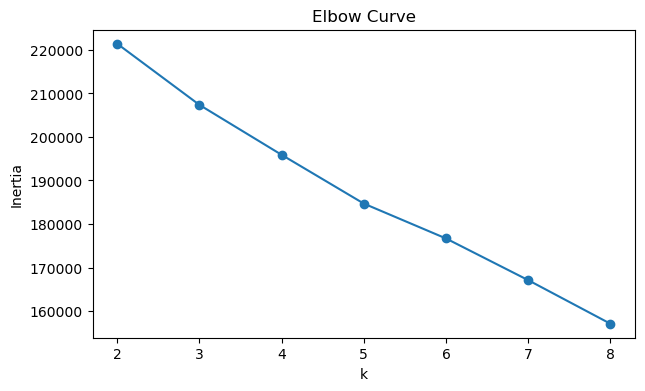

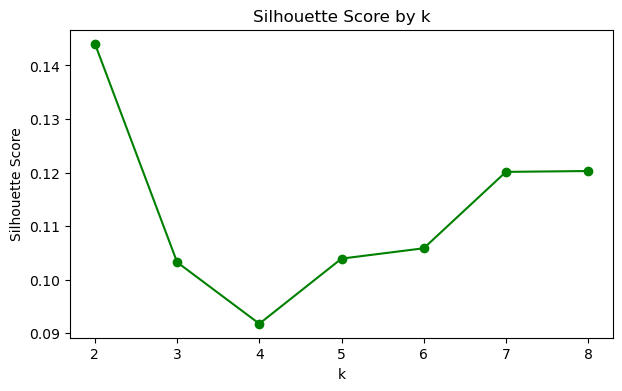

In [8]:
#take only some columns for simplicity
from sklearn.preprocessing import StandardScaler
df_cluster = df[['healthcare_provider', 'exercise', 'heart_attack', 'heart_disease',
       'stroke', 'kidney_diseases', 'blind', 'trouble_walking', 'flu_shot',
       'trouble_paying_bills', 'age', 'BMI', 'drinker', 'checkup_Past_Year',
       'no_teeth_removed', 'former_heavy_smoker', 'race_asian', 'race_black',
       'race_hispanic', 'college_grad']]
std = StandardScaler()
X = std.fit_transform(df_cluster)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

K_range = range(2, 9)
inertia = []
sil = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X, labels))


# Plot elbow
plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, "-o")
plt.title("Elbow Curve")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# Plot silhouette
plt.figure(figsize=(7,4))
plt.plot(K_range, sil, "-o", color="green")
plt.title("Silhouette Score by k")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()


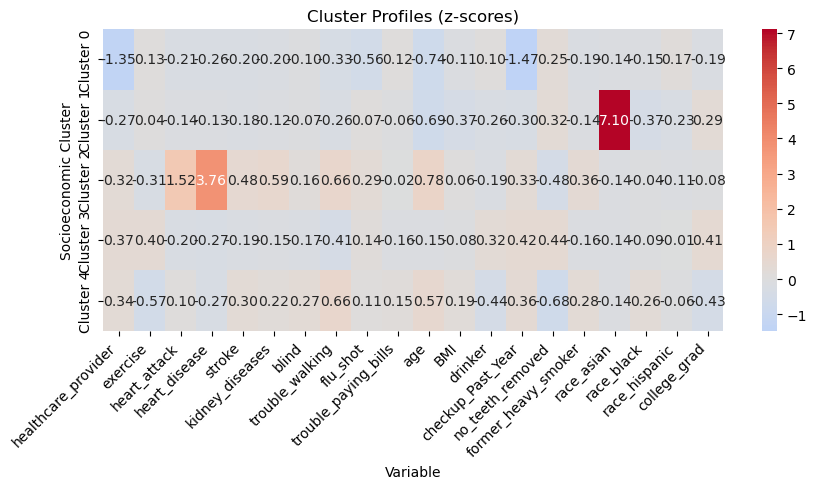

0                    General, less healthy
1    Those with other health issues, older
2              Young; No doctor or checkup
3                       General, healthier
4                    General, less healthy
Name: model_clusters, dtype: object

In [9]:
# Heatmap of profiles (in z-score)
k = 5
km = KMeans(n_clusters=k, random_state=42, n_init=10)
km.fit(X)

labels = km.fit_predict(X)

centres = pd.DataFrame(
    km.cluster_centers_,
    columns=df_cluster.columns#['CHCKDNY2', 'CVDCRHD4', 'EXERANY2', 'FLUSHOT7', '_SEX', '_AGE80', '_BMI5', 'MARITAL']
)

plt.figure(figsize=(9,5))
sns.heatmap(
    centres,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    yticklabels=[f"Cluster {i}" for i in range(k)]
)
plt.title("Cluster Profiles (z-scores)")
plt.xlabel("Variable")
plt.ylabel("Socioeconomic Cluster")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

model_clusters = pd.Series(km.labels_, name='model_clusters')
model_clusters.value_counts()


model_names = model_clusters.map({0: 'Young; No doctor or checkup',
                                    1: 'Asian, older',
                                    2: 'Those with other health issues, older',
                                    3: 'General, healthier',
                                    4: 'General, less healthy'})
model_names.head()



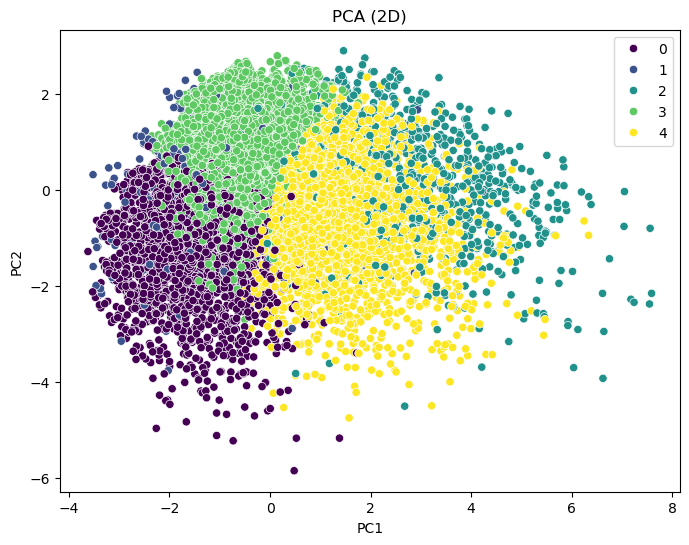

In [10]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=labels, palette="viridis")
plt.title("PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.13021949, 0.08703587])

In [12]:
pca.components_

array([[ 0.24735644, -0.23515754,  0.27601941,  0.29523044,  0.23260359,
         0.21830704,  0.15298475,  0.35503073,  0.16388709,  0.0393423 ,
         0.40531282,  0.08582588, -0.17340245,  0.25672775, -0.32592486,
         0.1893922 , -0.07359965,  0.08689596, -0.07091444, -0.1132804 ],
       [ 0.34517884,  0.26570986, -0.01516564,  0.03254606, -0.07159571,
        -0.01875511, -0.17765808, -0.17521491,  0.37178278, -0.34878957,
         0.24004293, -0.17446131,  0.20259707,  0.32237227,  0.14742514,
         0.04218609,  0.00681868, -0.15632259, -0.11144874,  0.43347309]])

In [13]:
##'PERSDOC3', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'CHCKDNY2',
#      'BLIND', 'DIFFWALK', 'FLUSHOT7', 'SDHBILLS', '_AGE80', '_BMI5',
#      'DRNKANY6', 'CHECKUP1_Past_Year', 'RMVTETH4_None',
#      '_LCSSMKG_Former_Heavy', '_IMPRACE_Asian', '_IMPRACE_Black',
#      '_IMPRACE_Hispanic', '_EDUCAG_College_Grad'

In [14]:
#pca1: hard walking, older, may have had diseases
#pca2: has doctor, exercises, educated

In [15]:
transformed = pd.DataFrame(pca.transform(X), columns=['PC1', 'PC2'])
transformed.head()

,PC1,PC2
0,0.749984,0.989481
1,1.795971,1.946895
2,-1.701943,-1.402032
3,-0.055280,2.131028
4,1.510485,-0.429094


Text(0, 0.5, '<-- Doctor, exercise, educated              Uneducated, no care-->')

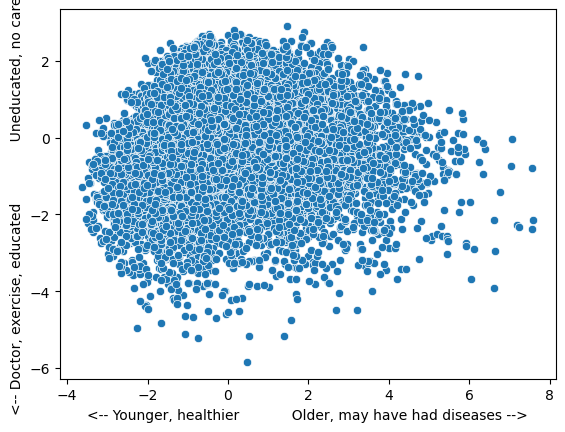

In [16]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='PC1', y='PC2', data=transformed)
plt.xlabel('<-- Younger, healthier            Older, may have had diseases -->')
plt.ylabel('<-- Doctor, exercise, educated              Uneducated, no care-->')

Text(0, 0.5, '<-- Doctor, exercise, educated              Uneducated, no care-->')

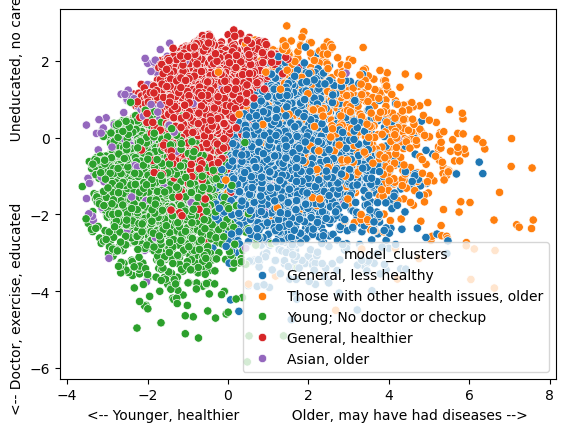

In [21]:
# overlay the kmeans clusters (hint: set the hue to be the cluster labels)
sns.scatterplot(x='PC1',
                y='PC2',
                data=transformed, hue=model_names)
plt.xlabel('<-- Younger, healthier            Older, may have had diseases -->')
plt.ylabel('<-- Doctor, exercise, educated              Uneducated, no care-->')